In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import pickle
import string
import re

# Web Scrapper

<div style="width:900px;background:#D9D9D9;border:1px solid black;text-align:left;padding:8px;">



<p>
<b>Step 1:</b> URL = https://www.indeed.com
<br><b>Step 2:</b> Keyword search parameter - "Data"
<br><b>Step 3:</b> Location choice - USA (more data is avaliable)
<br><b>Step 4:</b> Loop through 6 salary search parameter - "25000","35000","50000","65000","80000"
<br><b>Step 5:</b> Each salary parameter scrape 100 pages (1000 jobs)
<br><b>Step 6:</b> Scrape information: <b>job title, location, salary, ratings, reviews, summary</b>
<br><b>Step 7:</b> Save data into pickle file

</div>

# Data Cleaning

<div style="width:900px;background:#D9D9D9;border:1px solid black;text-align:left;padding:8px;">



<p>
<b>Job title, Companies, Summaries, Locations</b>
<br>1. Change data type from unicode to string. 
<br>2. Remove punctuations and special characters and lower case all text (except location)
<br>
<br><b> Location </b> 
<br>1. Replace with state abbrevations (e.g. AL, SF)
<br>
<br><b>Reviews, Ratings</b>
<br>1. Fill NaN with 0.0
<br><br><b>Salaries</b>
<br>1. If information is avaiable, scale into annual salary. 
<br>2. If salary range is provided, obtain mean of range. 
<br>3. If information not avaliable, impute with estimated salary (what was input in search bar during scrapping) 

</div>

In [22]:
def salary_func(x):
    
    """Extracts salary information if avaliable - and scale them into annual salaries
    if salary range is provided, take mean of range"""

    try:
        salary = np.mean([float(s) for s in re.findall(r'\d+',x.replace(',','').replace('$',''))])

        if 'hour' in x:
            salary = salary * 2080
        
        elif 'day' in x:
            salary = salary * 260
            
        elif 'week' in x:
            salary = salary * 52
        
        
    except:
        salary = np.nan
        
    return salary

In [23]:
jobs_file = pd.DataFrame()

for ind, filename in enumerate(glob.iglob('./*.pickle')):   # Iterates through all pickle file in folder
    
    # Open each file as data
    with open(filename) as inputfile:
        
        data = pickle.load(inputfile)  # Load pickle file

        # Clean text features
        
        data.job_titles = data.job_titles.map(lambda x : x.encode('ascii','ignore')\
                                              .replace('\n','')\
                                              .translate(None, string.punctuation)\
                                              .lower())
        
        data.companies = data.companies.map(lambda x : x.encode('ascii','ignore')\
                                              .replace('\n','')\
                                              .translate(None, string.punctuation)\
                                              .lower())
        
        data.locations = data.locations.map(lambda x : x.encode('ascii','ignore')\
                                              .replace('\n','')\
                                              .translate(None, string.punctuation))
        
        data.summaries = data.summaries.map(lambda x : x.encode('ascii','ignore')\
                                              .replace('\n','')\
                                              .translate(None, string.punctuation)
                                              .lower())

        # Impute NaN values with 0.0
        
        data.reviews = data.reviews.fillna(0.0)

        data.ratings = data.ratings.fillna(0.0)
        
        # Extract salaries

        data.salaries = data.salaries.map(salary_func)

        # If exact salary is not provided, impute with salary that was searched on
        
        base_salary = [25000,35000,50000,65000,80000,100000]

        for indx, base in enumerate(base_salary):

            if ind == indx:
                
                data.salaries = data.salaries.fillna(base)

        
    jobs_file = jobs_file.append(data)
        
        

In [24]:
jobs_file_2 = pd.DataFrame()

for ind, filename in enumerate(glob.iglob('./data_back/*.pickle')):   # Iterates through all pickle file in folder
    
    # Open each file as data
    with open(filename) as inputfile:
        
        data = pickle.load(inputfile)  # Load pickle file

        # Clean text features
        
        data.job_titles = data.job_titles.map(lambda x : x.encode('ascii','ignore')\
                                              .replace('\n','')\
                                              .translate(None, string.punctuation)\
                                              .lower())
        
        data.companies = data.companies.map(lambda x : x.encode('ascii','ignore')\
                                              .replace('\n','')\
                                              .translate(None, string.punctuation)\
                                              .lower())
        
        data.locations = data.locations.map(lambda x : x.encode('ascii','ignore')\
                                              .replace('\n','')\
                                              .translate(None, string.punctuation))
        
        data.summaries = data.summaries.map(lambda x : x.encode('ascii','ignore')\
                                              .replace('\n','')\
                                              .translate(None, string.punctuation)
                                              .lower())

        # Impute NaN values with 0.0
        
        data.reviews = data.reviews.fillna(0.0)

        data.ratings = data.ratings.fillna(0.0)
        
        # Extract salaries

        data.salaries = data.salaries.map(salary_func)

        # If exact salary is not provided, impute with salary that was searched on
        
        base_salary = [25000,35000,50000,65000,80000,100000]

        for indx, base in enumerate(base_salary):

            if ind == indx:
                
                data.salaries = data.salaries.fillna(base)

        
    jobs_file_2 = jobs_file_2.append(data)

In [25]:
jobs_file = pd.concat((jobs_file,jobs_file_2))

# EDA

<div style="width:900px;background:#D9D9D9;border:1px solid black;text-align:left;padding:8px;">

<p>
Check for NaN values
<br>
Remove duplicates
<br>
Investigate outliers

</div>

In [26]:
# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
jobs_file.drop_duplicates(inplace=True) # Remove duplicates

In [28]:
jobs_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10369 entries, 0 to 1099
Data columns (total 7 columns):
job_titles    10369 non-null object
companies     10369 non-null object
locations     10369 non-null object
reviews       10369 non-null float64
salaries      10369 non-null float64
ratings       10369 non-null float64
summaries     10369 non-null object
dtypes: float64(3), object(4)
memory usage: 648.1+ KB


In [29]:
jobs_file.reset_index(drop=True,inplace=True)  # Reset index

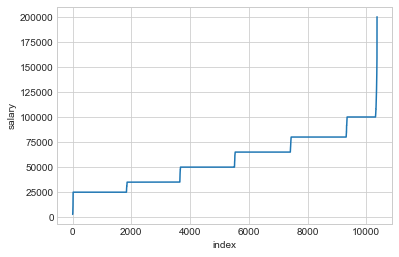

In [30]:
plt.plot(jobs_file.index,jobs_file.salaries.sort_values())
plt.xlabel('index')
plt.ylabel('salary')
plt.show()

In [31]:
jobs_file.describe()

,reviews,salaries,ratings
count,10369.000000,10369.000000,10369.000000
mean,2238.872119,56290.017745,40.107243
std,8644.637707,24187.345487,17.238691
min,0.000000,2819.000000,0.000000
25%,8.000000,35000.000000,42.000000
50%,154.000000,50000.000000,44.400000
75%,1255.000000,80000.000000,51.600000
max,115643.000000,200000.000000,60.000000


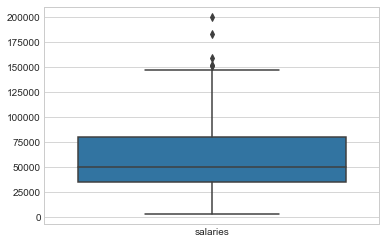

In [32]:
sns.set_style("whitegrid")
sns.boxplot(data=jobs_file[['salaries']])
plt.show()

<div style="width:900px;background:#D9D9D9;border:1px solid black;text-align:left;padding:8px;">

<p>
There are some salaries that are less than $10000 that could be due to human error.

</div>

In [33]:
drop_index = jobs_file[jobs_file.salaries < 10000].index

In [34]:
jobs_file.drop(drop_index, inplace=True)

In [35]:
jobs_file.describe()

,reviews,salaries,ratings
count,10358.000000,10358.000000,10358.000000
mean,2240.975671,56343.962782,40.113169
std,8648.980248,24143.312353,17.231916
min,0.000000,11377.500000,0.000000
25%,8.000000,35000.000000,42.000000
50%,154.000000,50000.000000,44.400000
75%,1255.000000,80000.000000,51.600000
max,115643.000000,200000.000000,60.000000


In [36]:
np.percentile(jobs_file.salaries,50)  # 50% percentile

50000.0

<div style="width:900px;background:#D9D9D9;border:1px solid black;text-align:left;padding:8px;">

<p>
Classify salaries into low, mid and high salary range

</div>

In [37]:
def classify(x):
    if x < 50000:
        c = 0
    else:
        c = 1
        
    return c

In [38]:
jobs_file.salaries = jobs_file.salaries.map(classify)

In [39]:
jobs_file.head()

,job_titles,companies,locations,reviews,salaries,ratings,summaries
0,data scientist,crossover,Remote,10.0,1,31.2,computer science ai deep learning data science...
1,data specialist solutions,facebook,Austin TX,204.0,0,52.2,partner with data science legal product engine...
2,data scientist,amazon corporate llc,Cambridge MA,18373.0,0,43.2,ensure data quality throughout all stages of a...
3,data scientist,lenovo,Raleigh NC 27616 Northeast area,686.0,0,44.4,expert in data modeling and data mining workin...
4,product owner planning data analytics,nike inc,Beaverton OR,4340.0,0,52.2,as a data and analytics product owner youll be...


# Data Cleaning (Locations)

<div style="width:900px;background:#D9D9D9;border:1px solid black;text-align:left;padding:8px;">



<p>
Locations are in different format, I will be standardising them with abbrevations

</div>

In [40]:
# Load state abbrevations data

states_ = pd.read_csv('./us_states.csv').iloc[:,:3]

In [41]:
states_['Capital'] = states_['Capital'].str.lower()
states_['State Name'] = states_['State Name'].str.lower()

In [42]:
states_dict = states_.set_index('Abbreviation').T.to_dict('list')

In [43]:
states = []

for state in jobs_file.locations:
    
    if state == 'Remote':
        states.append('Remote')
        
    else:
        abv = re.search(r'([A-Q][A-Q])',state)
        
        if abv is None:
            
            abb = 0
            for k,v in states_dict.items():
                if state.lower() in v:
                    abb = k
                else:
                    abb = 'US'
                
            states.append(abb)
            
        else:
            
            states.append(abv.group())


In [44]:
jobs_file.locations = states

# Feature Engineering

<div style="width:900px;background:#D9D9D9;border:1px solid black;text-align:left;padding:8px;">



<p>
Based on the companies, I will engineer a new binary column on whether the company is in the Forbes US 500 list (2016 & 2017)

</div>

In [45]:
fortune16 = pd.read_csv('./fortune500_16.csv')['Company Name']     # Load data
fortune17 = pd.read_csv('./fortune500_17.csv')['Company Name']

In [46]:
fortune = pd.concat([fortune16,fortune17]).drop_duplicates().reset_index(drop=True).dropna()  # Clean data
fortune = fortune.str.translate(None, string.punctuation).str.lower()

In [47]:
fortune500 = [1 if company in list(fortune) else 0 for company in jobs_file.companies] # 1 = company in Fortune500 list

In [48]:
jobs_file['fortune500'] = fortune500

# Pre-processing

<div style="width:900px;background:#D9D9D9;border:1px solid black;text-align:left;padding:8px;">



<p>
Scale numerical data - <b>Reviews, Ratings</b>
<Br>
Get dummy variables for categorical - <b>Locations</b>

</div>

In [49]:
from sklearn.preprocessing import RobustScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [50]:
jobs_file.head()

,job_titles,companies,locations,reviews,salaries,ratings,summaries,fortune500
0,data scientist,crossover,Remote,10.0,1,31.2,computer science ai deep learning data science...,0
1,data specialist solutions,facebook,US,204.0,0,52.2,partner with data science legal product engine...,1
2,data scientist,amazon corporate llc,MA,18373.0,0,43.2,ensure data quality throughout all stages of a...,0
3,data scientist,lenovo,NC,686.0,0,44.4,expert in data modeling and data mining workin...,0
4,product owner planning data analytics,nike inc,US,4340.0,0,52.2,as a data and analytics product owner youll be...,0


In [51]:
# Scale numerical data

rs = RobustScaler()

jobs_file.reviews = rs.fit_transform(jobs_file.reviews.values.reshape(-1, 1))
jobs_file.ratings = rs.fit_transform(jobs_file.ratings.values.reshape(-1, 1))

In [52]:
# Dummy variable for categorial data

states_dum = pd.get_dummies(jobs_file.locations,drop_first=True)
jobs_file = pd.concat((jobs_file,states_dum),axis=1)

In [53]:
jobs_nocomp = jobs_file.drop('companies',axis=1) 
jobs_nocomp = jobs_nocomp.drop('locations',axis=1) 

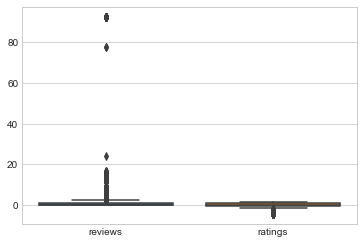

In [54]:
# Visualise outliers after scaling

sns.set_style("whitegrid")
sns.boxplot(data=jobs_nocomp[['reviews','ratings']])
plt.show()

In [55]:
jobs_nocomp = jobs_nocomp[jobs_nocomp.reviews < 40]  # Drop outliers

In [56]:
jobs_nocomp.job_titles = jobs_nocomp.job_titles.map(lambda x: 1 if 'scientist' in x else 0)

In [57]:
X = jobs_nocomp.drop('job_titles',axis=1)
y = jobs_nocomp['job_titles']

# Train Test Split

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2,stratify=y)

# Natural Language Processing

<div style="width:900px;background:#D9D9D9;border:1px solid black;text-align:left;padding:8px;">



<p>
<b>Step 1:</b> Add customized stopwords 
<br><b>Step 2:</b> Count vectorizer on job_titles, summaries and companies

</div>

In [61]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

In [62]:
stop.extend(['data'])

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
tfidf = TfidfVectorizer(stop_words = stop,max_features=20)
tfidf.fit(X_train['summaries'])

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=20, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words=[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u'her', u'hers', u'herself', u'it', u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'w...', u'mightn', u'mustn', u'needn', u'shan', u'shouldn', u'wasn', u'weren', u'won', u'wouldn', 'data'],
        strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [65]:
summaries  = pd.DataFrame(tfidf.transform(X_train['summaries']).todense(),
             columns=tfidf.get_feature_names())

In [66]:
X_train_new = pd.concat((X_train.drop(['summaries'],axis=1).reset_index(drop=True),summaries),axis=1)

In [67]:
X_train_new.head()

,reviews,salaries,ratings,fortune500,AL,CA,CO,DC,DE,FL,...,quality,related,research,science,sources,statistics,team,work,working,years
0,-0.049719,1,-0.3125,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
1,0.582197,1,0.7500,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.354385,0.0,0.0,0.000000,0.0,0.000000,0.0
2,-0.112269,1,-0.1875,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
3,0.469928,0,0.7500,1,0,1,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.711019,0.0,0.000000,0.0
4,4.162791,1,0.6875,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.700758,0.0


<div style="width:900px;background:#D9D9D9;border:1px solid black;text-align:left;padding:8px;">



<p>
Transform test set with training model

</div>

In [68]:
# Transform summaries

test_summaries  = pd.DataFrame(tfidf.transform(X_test['summaries']).todense(),
             columns=tfidf.get_feature_names())

In [73]:
X_test_new = pd.concat((X_test.drop(['summaries'],axis=1).reset_index(drop=True),test_summaries),axis=1)

# Base Model

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
lr = LogisticRegression(random_state=2)

In [77]:
from sklearn.model_selection import cross_val_score

In [78]:
cross_val_score(lr,X_train_new,y_train)

array([ 0.7781155 ,  0.77410947,  0.77410947])

In [79]:
lr.fit(X_train_new,y_train)
lr.score(X_test_new,y_test)   # Accuracy on test set

0.77196591243020862

In [80]:
from sklearn.metrics import classification_report

In [81]:
print classification_report(y_test,lr.predict(X_test_new))

             precision    recall  f1-score   support

          0       0.80      0.93      0.86      2528
          1       0.60      0.33      0.43       875

avg / total       0.75      0.77      0.75      3403



In [82]:
# Learning Curve
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

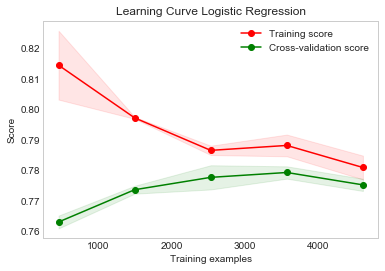

In [83]:
title = 'Learning Curve Logistic Regression'
plot_learning_curve(lr, title, X_train_new,y_train, ylim=None, cv=None,\
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
plt.show()

In [84]:
X_train_new.shape  # There are more than 7000 features!

(6907, 55)

# Feature Processing

<div style="width:900px;background:#D9D9D9;border:1px solid black;text-align:left;padding:8px;">



<p>
Looks better! But overall accuracy is still quite low. In addition, from the Classification Report, there is higher recall score and a lower precision score on '0' (not data scientist). Resampling of the minority class may be able to help.

</div>

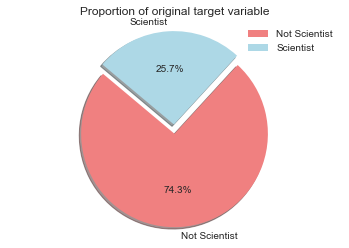

In [88]:
# Data to plot
labels = 'Not Scientist','Scientist'
sizes = [y_train.value_counts()[0],y_train.value_counts()[1]]
colors = ['lightcoral','lightblue']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.legend()
plt.title('Proportion of original target variable')

plt.show()

In [89]:
y_train.value_counts()[0]

5131

In [87]:
y_train.value_counts()[1]

1776

# Resampling to oversample minority class

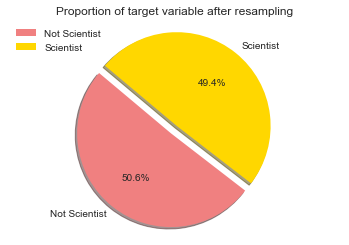

In [90]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(ratio={1:5000},random_state=2)
X_train_res, y_train_res = smote.fit_sample(X_train_new, y_train)

# Data to plot
y_train_res = pd.Series(y_train_res)

labels = 'Not Scientist','Scientist'
sizes = [y_train_res.value_counts()[0],y_train_res.value_counts()[1]]
colors = ['lightcoral','gold']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.legend()
plt.title('Proportion of target variable after resampling')

plt.show()

In [91]:
lr = LogisticRegression(random_state=2)
print 'cross val score: ', cross_val_score(lr,X_train_res,y_train_res)

lr.fit(X_train_res,y_train_res)
print 'accuracy on test: ', lr.score(X_test_new,y_test)
print
print classification_report(y_test,lr.predict(X_test_new))

cross val score:  [ 0.69863825  0.70062185  0.72245261]
accuracy on test:  0.714957390538

             precision    recall  f1-score   support

          0       0.85      0.74      0.80      2528
          1       0.46      0.63      0.53       875

avg / total       0.75      0.71      0.73      3403



<div style="width:900px;background:#D9D9D9;border:1px solid black;text-align:left;padding:8px;">



<p>
Now its a lot more balanced! Lets try other classification models to see if we can improve the scores.

</div>

# Modelling & Evaluation

<div style="width:900px;background:#D9D9D9;border:1px solid black;text-align:left;padding:8px;">



<p>
<b>Random Forest</b>

</div>

In [92]:
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

In [93]:
rfc_params = {
    'n_estimators':[5,10],
    'max_depth':[1,2,3,4,5,6,7],
    'max_features':[None,'log2','sqrt',2,5],
    #'min_samples_split':[2,3,4,5,10]
}


rfc_gs = GridSearchCV(RandomForestClassifier(random_state=6), \
                              rfc_params, cv=5, verbose=1,n_jobs=-1)#,scoring='f1')
rfc_gs.fit(X_train_res, y_train_res)

y_pred = rfc_gs.predict(X_test_new)  # predictions on test 
    
print classification_report(y_test,y_pred)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:   14.2s finished


             precision    recall  f1-score   support

          0       0.87      0.83      0.85      2528
          1       0.57      0.66      0.61       875

avg / total       0.80      0.78      0.79      3403



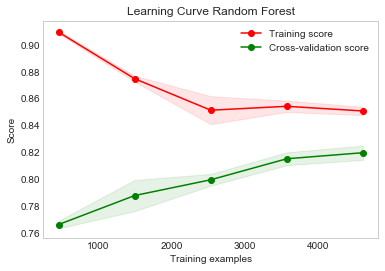

In [94]:
title = 'Learning Curve Random Forest'
plot_learning_curve(rfc_gs.best_estimator_, title, X_train_new,y_train, ylim=None, cv=None,\
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
plt.show()

In [95]:
rfc_gs.score(X_test_new,y_test)   # Accuracy Score

0.78372024684102259

In [96]:
importance = rfc_gs.best_estimator_.feature_importances_

In [97]:
pd.DataFrame(importance,columns=['features_importances'],index=X_test_new.columns)\
.sort_values('features_importances',ascending=False).head(10)

,features_importances
science,0.494815
reviews,0.076123
ratings,0.040593
CA,0.037146
experience,0.030096
sources,0.030074
research,0.022940
business,0.021747
statistics,0.020482
quality,0.020232


<div style="width:900px;background:#D9D9D9;border:1px solid black;text-align:left;padding:8px;">



<p>
<b>Resampling using SMOTEEN</b>
<br>
<b>Random Forest</b>

</div>

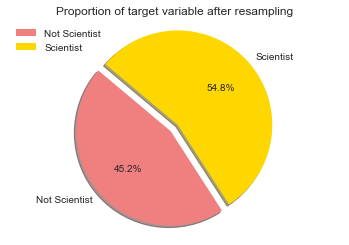

In [98]:
from imblearn.combine import SMOTEENN

# Dealing with imbalance with SMOTEEN resampling

smoteenn = SMOTEENN(random_state=2,smote=SMOTE(ratio={1:5000},random_state=2))
X_train_res, y_train_res = smoteenn.fit_sample(X_train_new, y_train)

# Data to plot
y_train_res = pd.Series(y_train_res)

labels = 'Not Scientist','Scientist'
sizes = [y_train_res.value_counts()[0],y_train_res.value_counts()[1]]
colors = ['lightcoral','gold']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.legend()
plt.title('Proportion of target variable after resampling')

plt.show()

In [99]:
rfc_params = {
    'n_estimators':[5,10,20],
    'max_depth':[1,2,3,4,5,6,7],
    'max_features':['log2','sqrt',2,5,8],
    #'min_samples_split':[2,3,4,5,10]
}


rfc_gs = GridSearchCV(RandomForestClassifier(random_state=6), \
                              rfc_params, cv=5, verbose=1,n_jobs=-1)#,scoring='f1')
rfc_gs.fit(X_train_res, y_train_res)

y_pred = rfc_gs.predict(X_test_new)  # predictions on test 
    
print classification_report(y_test,y_pred)

Fitting 5 folds for each of 105 candidates, totalling 525 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 518 out of 525 | elapsed:   18.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 525 out of 525 | elapsed:   18.6s finished


             precision    recall  f1-score   support

          0       0.87      0.75      0.81      2528
          1       0.49      0.68      0.57       875

avg / total       0.77      0.73      0.75      3403



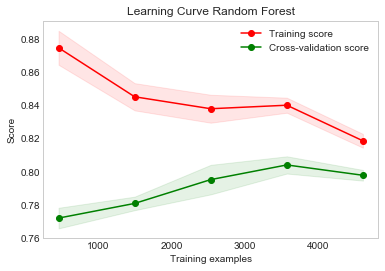

In [100]:
title = 'Learning Curve Random Forest'
plot_learning_curve(rfc_gs.best_estimator_, title, X_train_new,y_train, ylim=None, cv=None,\
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
plt.show()

In [101]:
rfc_gs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=6, verbose=0, warm_start=False)

In [102]:
rfc_gs.score(X_test_new,y_test)   # Accuracy Score

0.73493975903614461

In [103]:
importance = rfc_gs.best_estimator_.feature_importances_

In [104]:
pd.DataFrame(importance,columns=['features_importances'],index=X_test_new.columns)\
.sort_values('features_importances',ascending=False).head(10)

,features_importances
science,0.339539
quality,0.075533
statistics,0.075286
reviews,0.062095
computer,0.049823
CA,0.049663
experience,0.030514
degree,0.030254
business,0.028167
management,0.027059


<div style="width:900px;background:#D9D9D9;border:1px solid black;text-align:left;padding:8px;">



<p>
<b>Support Vector Machine</b>

</div>

In [105]:
svc = SVC()
svc.fit(X_train_res, y_train_res)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [106]:
y_pred = svc.predict(X_test_new)  # predictions on test 
    
print classification_report(y_test,y_pred)

             precision    recall  f1-score   support

          0       0.87      0.70      0.78      2528
          1       0.45      0.71      0.55       875

avg / total       0.77      0.71      0.72      3403



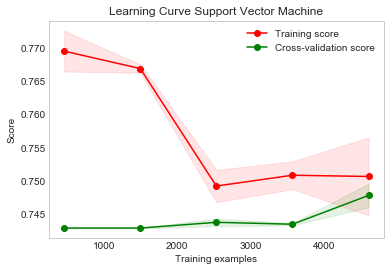

In [107]:
title = 'Learning Curve Support Vector Machine'
plot_learning_curve(svc, title, X_train_new,y_train, ylim=None, cv=None,\
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
plt.show()